In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from tabulate import tabulate
from scipy.stats import chi2_contingency 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from scipy.special import expit
from sklearn.pipeline import Pipeline

dataset = pd.read_csv("dataset.csv", dtype={'Administrative_Duration': float, "Informational_Duration": float, "ProductRelated_Duration": float, "BounceRates": float, "PageValues": float})

%matplotlib notebook
%matplotlib inline

In [61]:
print(dataset.shape)
# dataset.head()
print(dataset.info())
# print(dataset.describe())

(12330, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficTyp

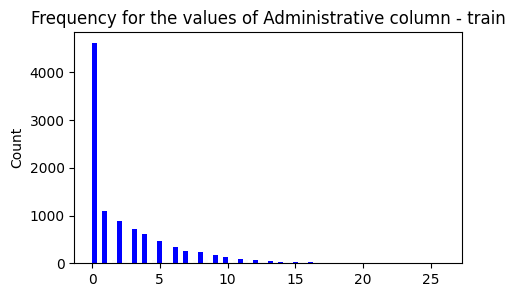

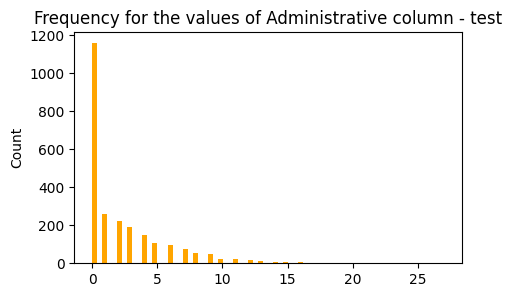

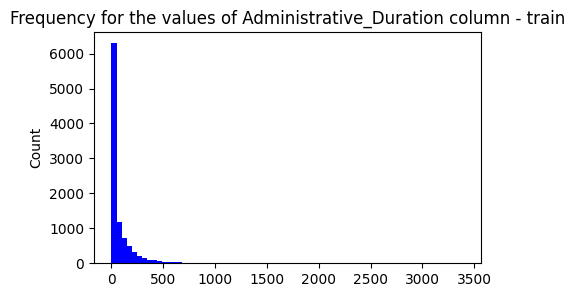

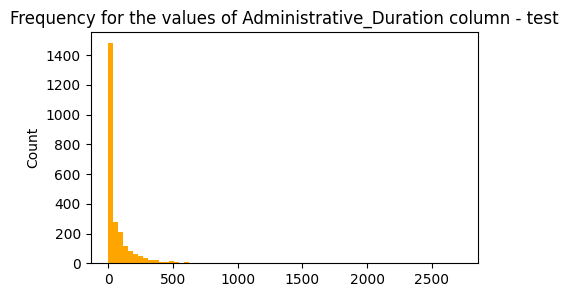

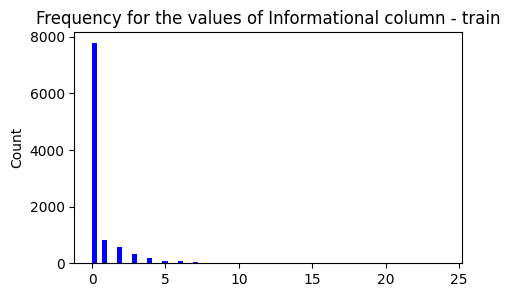

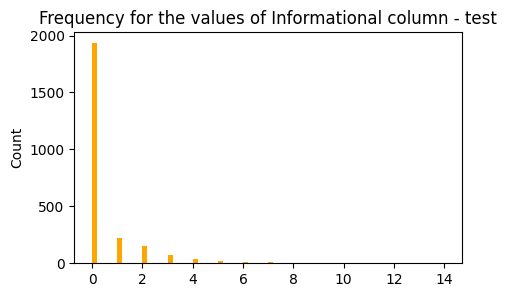

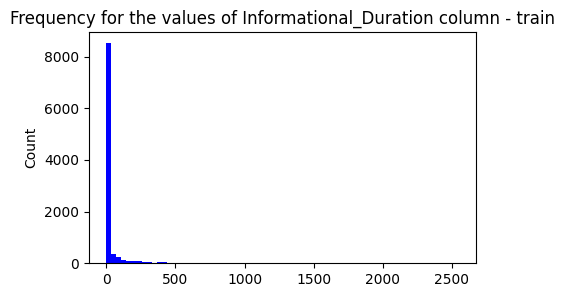

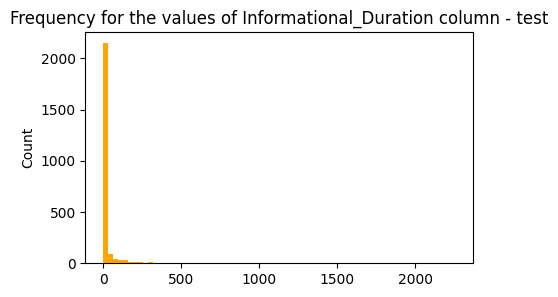

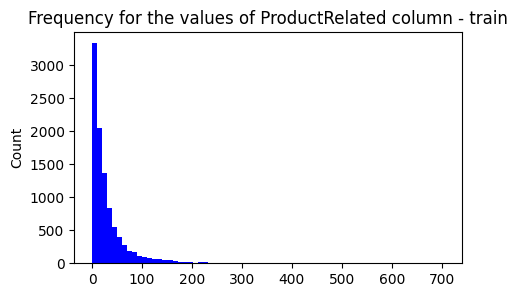

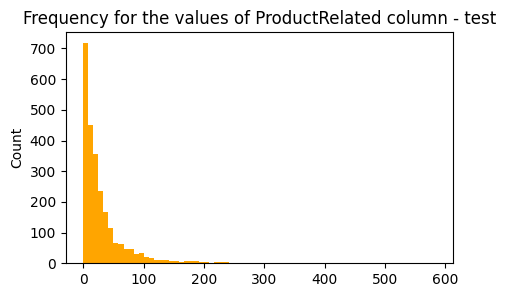

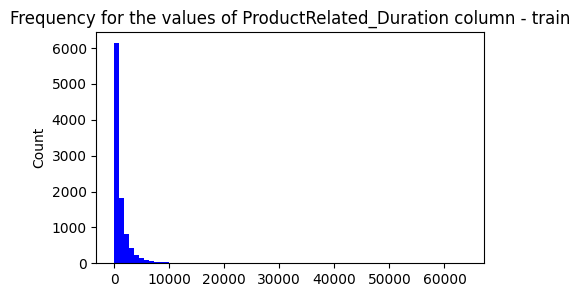

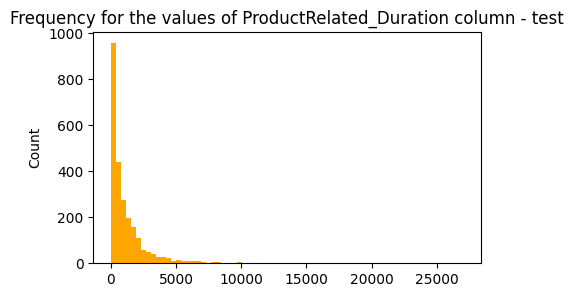

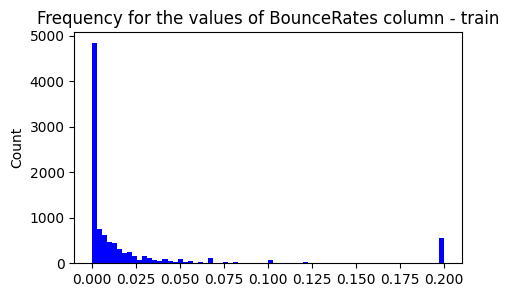

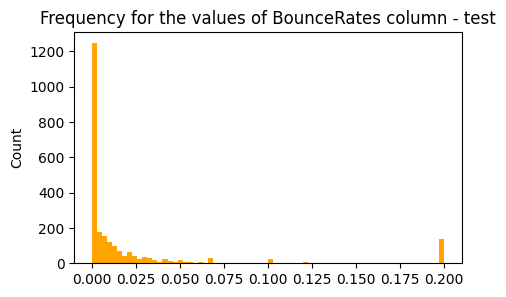

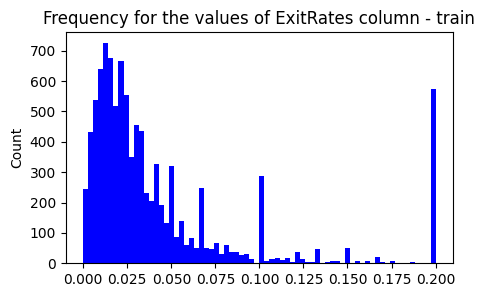

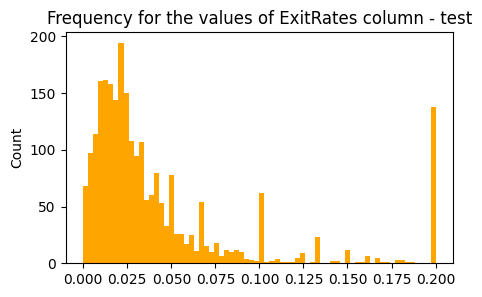

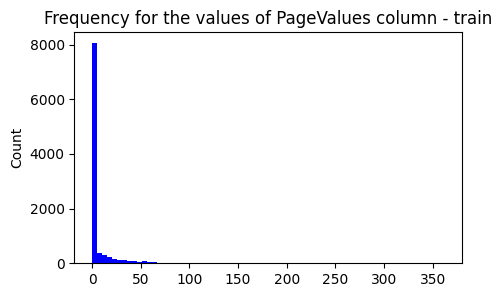

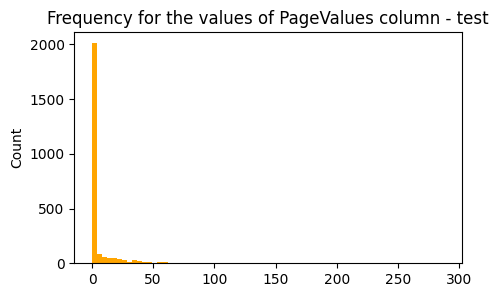

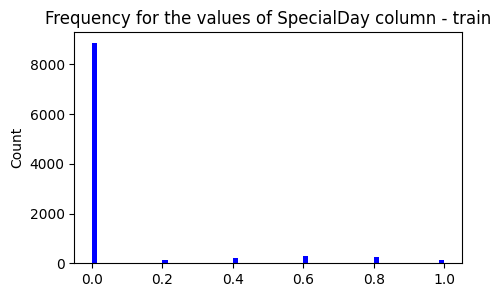

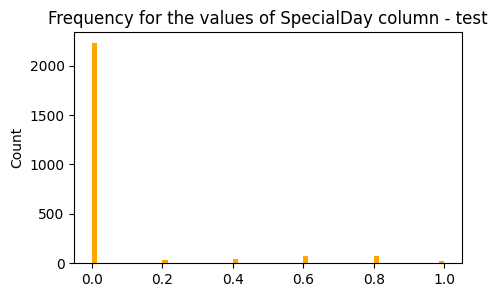

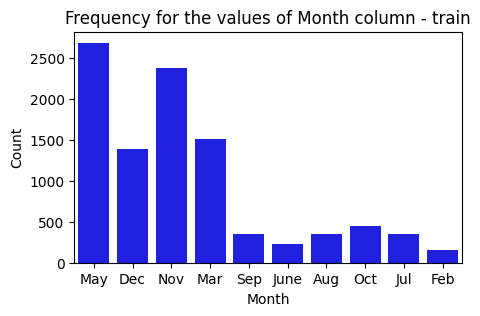

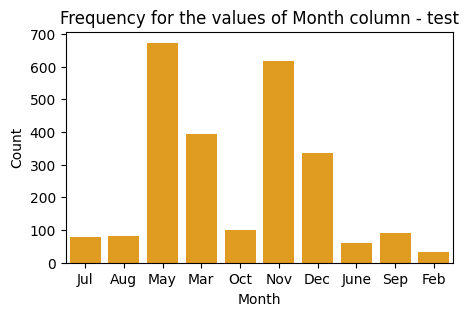

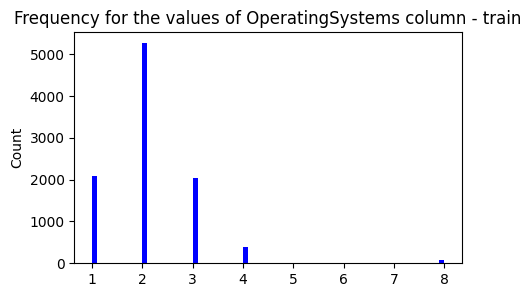

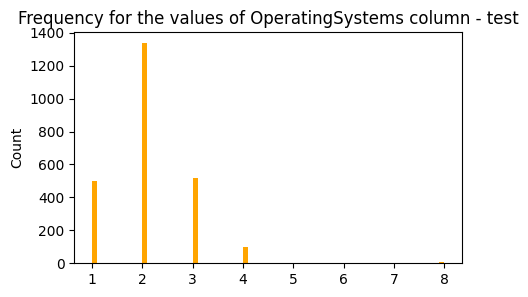

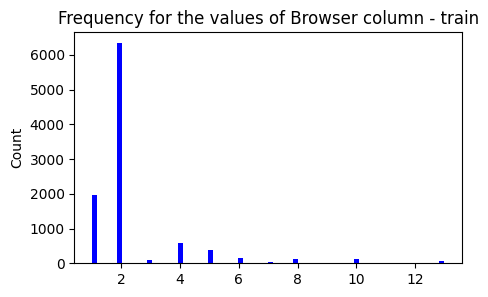

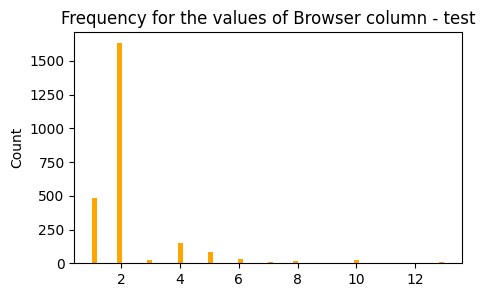

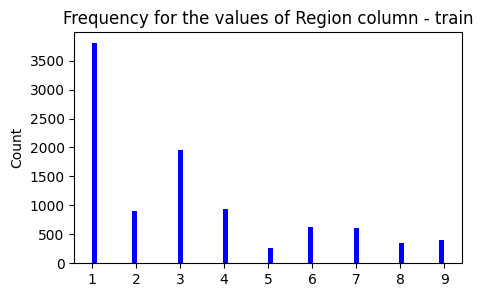

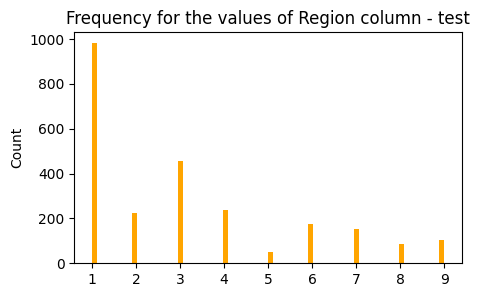

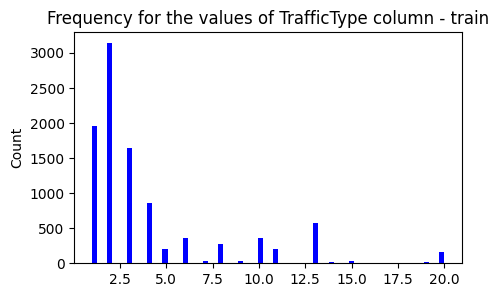

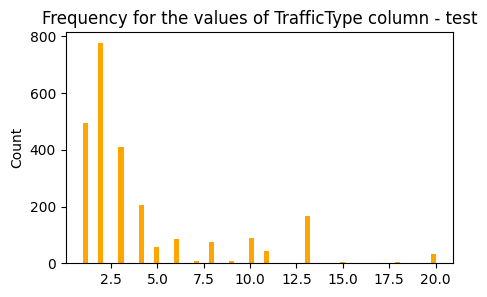

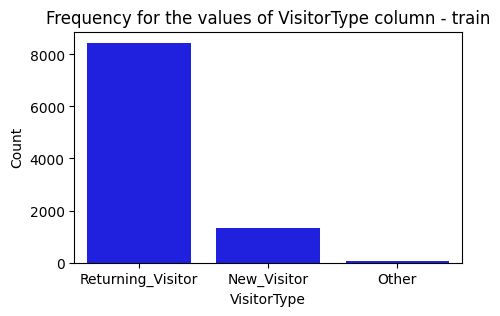

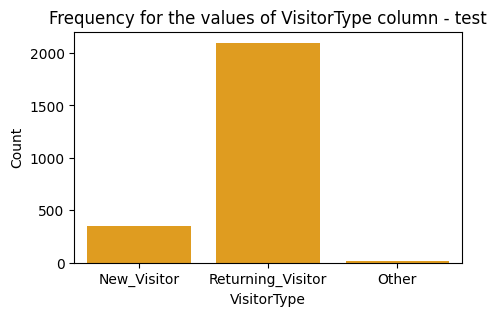

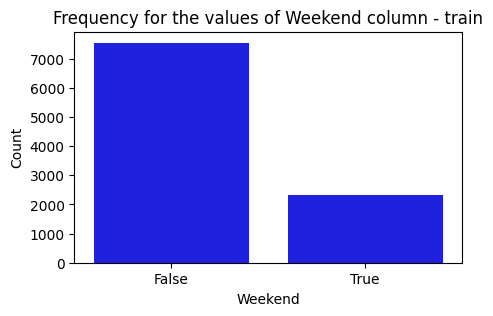

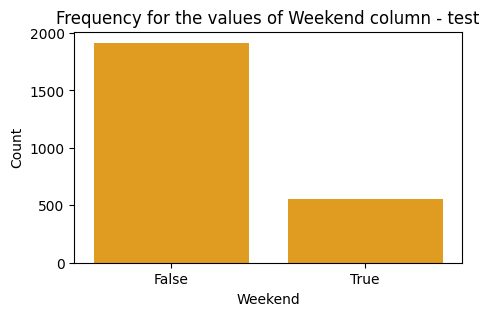

In [62]:
X = dataset.iloc[:, :-1].values
T = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, T, test_size=0.20, random_state=1)

df_train = pd.DataFrame(X_train, columns=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend'])
df_test = pd.DataFrame(X_test, columns=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend'])

for col in df_train.columns:
    if(col not in ['Month', 'VisitorType', 'Weekend', 'Revenue']):
        plt.figure(figsize=(5, 3))
        plt.ylabel('Count')
        plt.title(f"Frequency for the values of {col} column - train")
        plt.hist(df_train[col], bins=70, color='blue')
        plt.show()
        
        plt.figure(figsize=(5, 3))
        plt.ylabel('Count')
        plt.title(f"Frequency for the values of {col} column - test")
        plt.hist(df_test[col], bins=70, color='orange')
        plt.show()
    else:
        plt.figure(figsize=(5, 3))
        plt.ylabel('Count')
        plt.title(f"Frequency for the values of {col} column - train")
        sns.countplot(x=col, data=df_train, color='blue')
        plt.show()
        
        plt.figure(figsize=(5, 3))
        plt.ylabel('Count')
        plt.title(f"Frequency for the values of {col} column - test")
        sns.countplot(x=col, data=df_test, color='orange')
        plt.show()


[(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]
col: Administrative -> type: int64
[0, 0, 0, 0, 5768, 1354, 1114, 915, 1772, 1406]


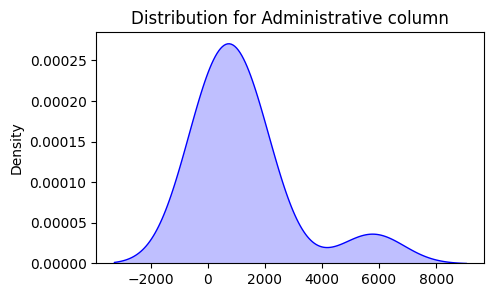

col: Administrative_Duration -> type: float64
[0, 0, 0, 0, 6164, 1222, 1244, 1233, 1234, 1232]


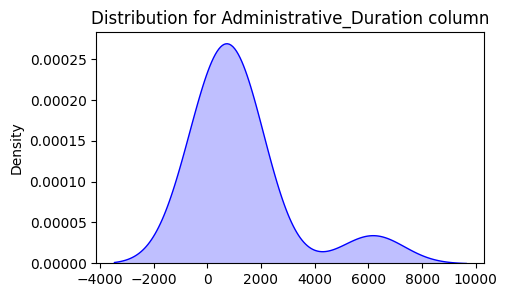

col: Informational -> type: int64
[0, 0, 0, 0, 0, 0, 0, 9699, 1041, 1589]


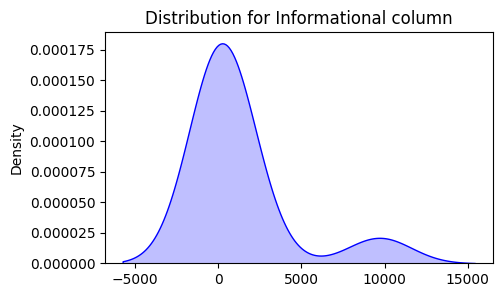

col: Informational_Duration -> type: float64
[0, 0, 0, 0, 0, 0, 0, 0, 11095, 1234]


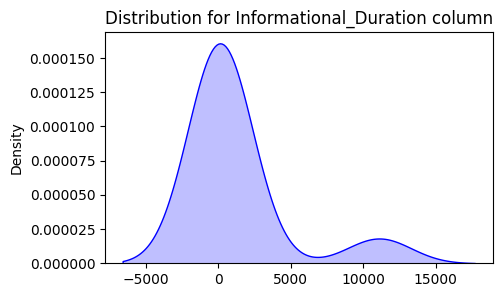

col: ProductRelated -> type: int64
[1125, 1244, 1157, 1268, 1296, 1235, 1227, 1245, 1293, 1239]


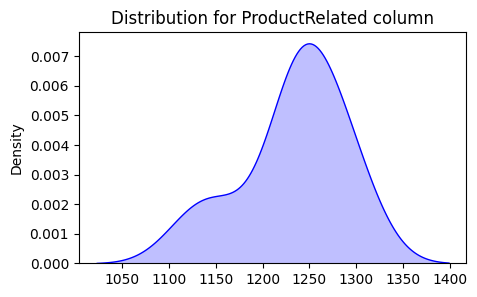

col: ProductRelated_Duration -> type: float64
[1231, 1231, 1237, 1233, 1233, 1232, 1234, 1233, 1233, 1232]


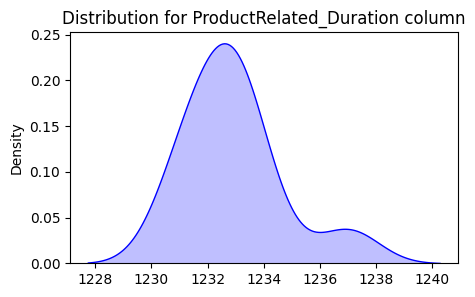

col: BounceRates -> type: float64
[0, 0, 0, 0, 6165, 1215, 1251, 1230, 1236, 533]


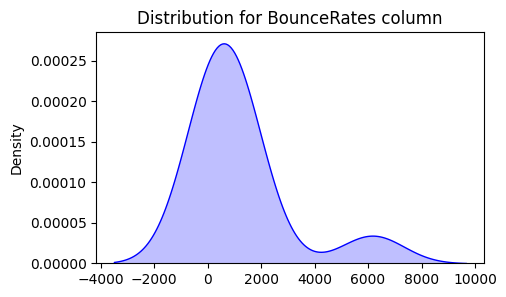

col: ExitRates -> type: float64
[1233, 1233, 1231, 1226, 1242, 1233, 1230, 1225, 1027, 740]


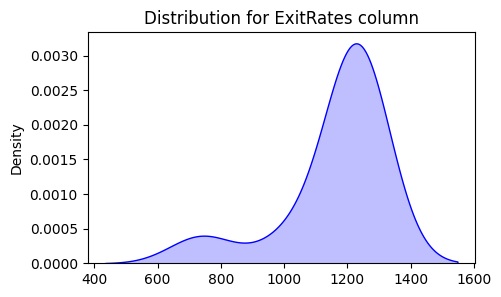

col: PageValues -> type: float64
[0, 0, 0, 0, 0, 0, 0, 9864, 1233, 1232]


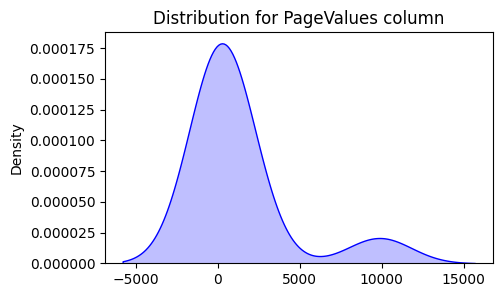

col: SpecialDay -> type: float64
[0, 0, 0, 0, 0, 0, 0, 0, 11079, 1097]


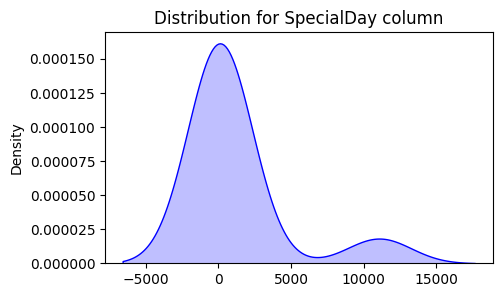

col: OperatingSystems -> type: int64
[0, 0, 2585, 0, 0, 0, 0, 6601, 0, 3065]


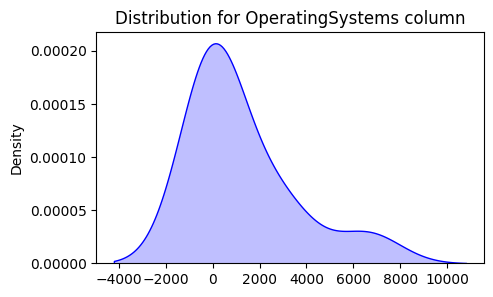

col: Browser -> type: int64
[0, 2462, 0, 0, 0, 0, 0, 0, 8066, 1741]


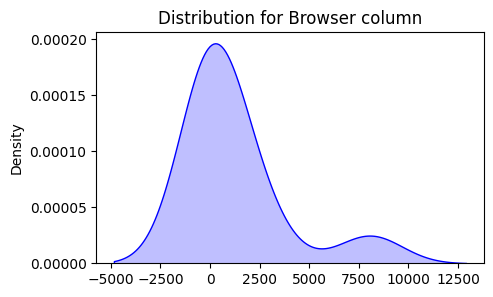

col: Region -> type: int64
[0, 0, 0, 4780, 1136, 0, 2403, 1500, 805, 1195]


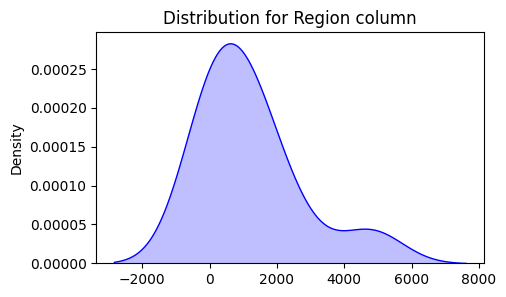

col: TrafficType -> type: int64
[0, 2451, 0, 0, 0, 3913, 2052, 1329, 1319, 1068]


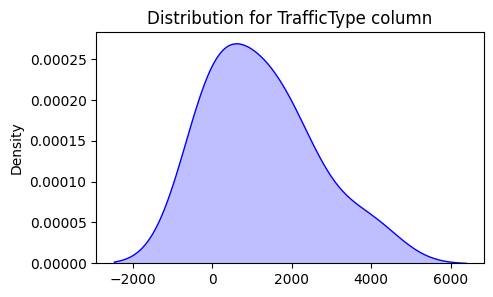

In [63]:
percentile_ranges = []
for i in range(10):
    percentile_ranges.append((i*10, (i+1)*10))

print(percentile_ranges)

for col in dataset.columns:
    if(np.issubdtype(dataset[col].dtype, np.number)):
        plt.figure(figsize=(5, 3))
        plt.title(f"Distribution for {col} column")
        print(f"col: {col} -> type: {dataset[col].dtype}")
        counts = [np.sum((dataset[col] >= np.percentile(dataset[col], low)) & (dataset[col] < np.percentile(dataset[col], high))) for low, high in percentile_ranges]
        print(counts)
        sns.kdeplot(x=counts, fill=True, color="blue")
        plt.show()

col: Month -> type: object


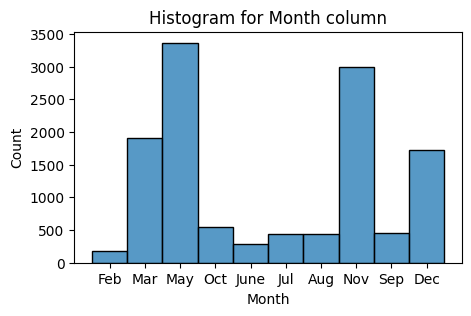

col: VisitorType -> type: object


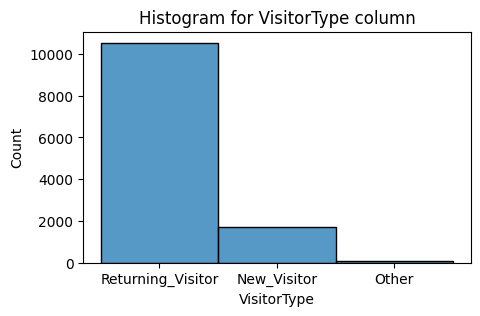

col: Weekend -> type: bool


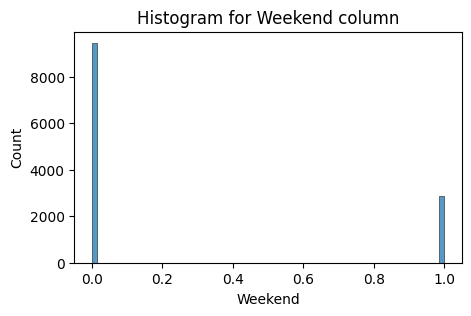

col: Revenue -> type: bool


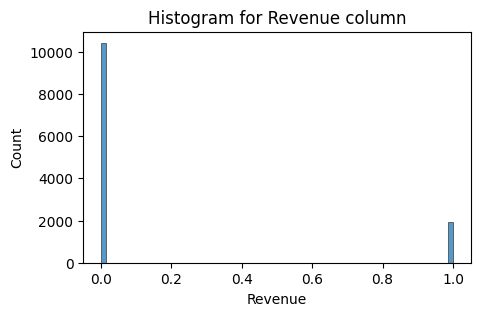

In [64]:
for col in dataset.columns:
    if(not np.issubdtype(dataset[col].dtype, np.number)):
        print(f"col: {col} -> type: {dataset[col].dtype}")
        plt.figure(figsize=(5, 3))
        plt.title(f"Histogram for {col} column")
        sns.histplot(x=col, data=dataset, bins=70)
        plt.show()

Attribute Administrative with P-value <= 0.05 has coefficient 0.1389170941506722
Attribute Administrative_Duration with P-value <= 0.05 has coefficient 0.09358671905704195
Attribute Informational with P-value <= 0.05 has coefficient 0.09520034257205715
Attribute Informational_Duration with P-value <= 0.05 has coefficient 0.07034450234598343
Attribute ProductRelated with P-value <= 0.05 has coefficient 0.15853798428087473
Attribute ProductRelated_Duration with P-value <= 0.05 has coefficient 0.1523726105570103
Attribute BounceRates with P-value <= 0.05 has coefficient -0.1506729119260539
Attribute ExitRates with P-value <= 0.05 has coefficient -0.20707108205527175
Attribute PageValues with P-value <= 0.05 has coefficient 0.49256929525120746
Attribute SpecialDay with P-value <= 0.05 has coefficient -0.08230459817953263
Attribute Browser with P-value <= 0.05 has coefficient 0.023984289404092914
╒═════════════════════════╤═══════════════╤══════════════╕
│       Column name       │  Coeffic

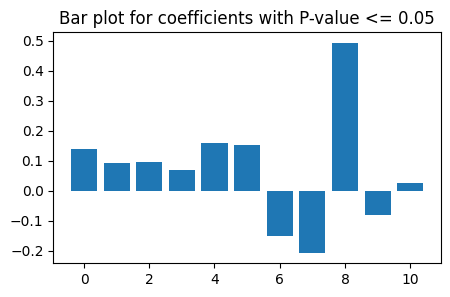

In [65]:
headers = ["Column name", "Coefficient", "P-value"]
data = []
coefs = []
for col in dataset.columns:
    if(np.issubdtype(dataset[col].dtype, np.number)):
        coef, p = stats.pointbiserialr(dataset[col], dataset['Revenue'])
        data.append([col, coef, p]) 
        if(p <= 0.05):
            print(f"Attribute {col} with P-value <= 0.05 has coefficient {coef}")
            coefs.append(coef)

table = tabulate(data, headers, tablefmt="fancy_grid", colalign=("center", "center", "center"))
print(table)

plt.figure(figsize=(5, 3))
plt.title("Bar plot for coefficients with P-value <= 0.05")
plt.bar([i for i in range(len(coefs))], coefs)
plt.show()

Attribute Month with P-value <= 0.05 has coefficient 7.536145352193617
Attribute Weekend with P-value <= 0.05 has coefficient 10.58183514829754
╒═══════════════╤═══════════════╤════════════╕
│  Column name  │  Coefficient  │  P-value   │
╞═══════════════╪═══════════════╪════════════╡
│     Month     │    7.53615    │ 0.0230965  │
├───────────────┼───────────────┼────────────┤
│  VisitorType  │    1.61638    │  0.445664  │
├───────────────┼───────────────┼────────────┤
│    Weekend    │    10.5818    │ 0.00503714 │
╘═══════════════╧═══════════════╧════════════╛


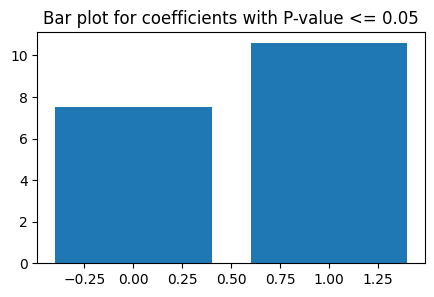

In [66]:
headers = ["Column name", "Coefficient", "P-value"]
data = []
coefs = []
for col in dataset.columns:
    if(not np.issubdtype(dataset[col].dtype, np.number)):
        if col != 'Revenue':
            chisqt = pd.crosstab(dataset[col], dataset['Revenue'], margins=True)
            value = np.array([chisqt.iloc[0][0:5].values,
                            chisqt.iloc[1][0:5].values])
            coef, p, dof = chi2_contingency(value)[0:3]
            data.append([col, coef, p])
            if(p <= 0.05):
                print(f"Attribute {col} with P-value <= 0.05 has coefficient {coef}")
                coefs.append(coef)

table = tabulate(data, headers, tablefmt="fancy_grid", colalign=("center", "center", "center"))
print(table)

plt.figure(figsize=(5, 3))
plt.title("Bar plot for coefficients with P-value <= 0.05")
plt.bar([i for i in range(len(coefs))], coefs)
plt.show()

In [67]:
def process_data(sc, algorithm):
    df = pd.DataFrame(dataset)
    scaler = sc

    for col in df.columns:
        if(not np.issubdtype(df[col].dtype, np.number)) and algorithm == 'logistic_regression':
            df[col] = LabelEncoder().fit_transform(df[col])
            
        if(df[col].describe().loc['std'] > 40):
            df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))
            
    X = df.iloc[:, :-1].values
    T = df.iloc[:, -1].values

    return X, T

In [68]:
def logistic(x):
    return expit(x)

# Expresia pentru Negative Log Likelihood - functia J(w)
def nll(Y, T):
    return -np.sum(T * np.log(Y) + (1 - T) * np.log(1.0 - Y))

In [69]:
def train_logistic(X, T, lr=.01, epochs_no=100):
    # Antrenare model logistic
    (N, D) = X.shape
    X_hat = np.concatenate([X, np.ones((N, 1))], axis=1)
    W = np.random.randn(D + 1)

    for _ in range(epochs_no):
        Y = logistic(np.dot(X_hat, W))
        W -= lr * np.dot(np.transpose(X_hat), Y - T)
    return W

def predict_logistic(X, W):
    # Calculeaza predictia Y
    (N, D) = X.shape
    X_hat = np.concatenate([X, np.ones((N, 1))], axis=1)
    Y = logistic(np.dot(X_hat, W))
    return Y

In [70]:
headers = ["Scaler - Type", "Mean - precision", "Mean - recall", "Mean - F1", "Variance - precision", "Variance - recall", "Variance - F1"]
data = []
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]

for sc in scalers:
    precisions_manual = []
    recalls_manual = []
    f1s_manual = []
    precisions_library = []
    recalls_library = []
    f1s_library = []
    for i in range(11):
        X, T = process_data(sc, "logistic_regression")
        X_train, X_test, y_train, y_test = train_test_split(X, T, test_size=0.20, random_state=1)
        
        W = train_logistic(X_train, y_train, lr=.1, epochs_no=1000)
        Y = predict_logistic(X_test, W)
        
        precisions_manual.append(precision_score(y_test, np.round(Y), zero_division=0))
        recalls_manual.append(recall_score(y_test, np.round(Y)))
        f1s_manual.append(f1_score(y_test, np.round(Y)))

        pipeline = Pipeline([
            ('scaler', sc),
            ('classifier', LogisticRegression(max_iter=1000))
        ])

        pipeline.fit(X_train, y_train)    
        Y = pipeline.predict(X_test)
 
        precisions_library.append(precision_score(y_test, np.round(Y), zero_division=0))
        recalls_library.append(recall_score(y_test, np.round(Y)))
        f1s_library.append(f1_score(y_test, np.round(Y)))
        
    data.append([str(sc.__class__.__name__) + " - manual", np.mean(precisions_manual), np.mean(recalls_manual), np.mean(f1s_manual), np.var(precisions_manual), np.var(recalls_manual), np.var(f1s_manual)])
    data.append([str(sc.__class__.__name__) + " - library", np.mean(precisions_library), np.mean(recalls_library), np.mean(f1s_library), np.var(precisions_library), np.var(recalls_library), np.var(f1s_library)])
    
table = tabulate(data, headers, tablefmt="fancy_grid", colalign=("center", "center", "center"))
print(table)

╒══════════════════════════╤════════════════════╤═════════════════╤═════════════╤════════════════════════╤═════════════════════╤═════════════════╕
│      Scaler - Type       │  Mean - precision  │  Mean - recall  │   Mean - F1 │   Variance - precision │   Variance - recall │   Variance - F1 │
╞══════════════════════════╪════════════════════╪═════════════════╪═════════════╪════════════════════════╪═════════════════════╪═════════════════╡
│  MinMaxScaler - manual   │      0.664586      │    0.439782     │    0.515753 │              0.0109281 │         0.0112237   │     0.0031256   │
├──────────────────────────┼────────────────────┼─────────────────┼─────────────┼────────────────────────┼─────────────────────┼─────────────────┤
│  MinMaxScaler - library  │        0.75        │    0.282051     │    0.409938 │              0         │         3.08149e-33 │     3.08149e-33 │
├──────────────────────────┼────────────────────┼─────────────────┼─────────────┼────────────────────────┼────────────

In [71]:
headers = ["Scaler - MaxDepth", "Mean - precision", "Mean - recall", "Mean - F1", "Variance - precision", "Variance - recall", "Variance - F1"]
data = []
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler(), None]
for sc in scalers:
    for max_depth in range(3, 7):
        precisions_library = []
        recalls_library = []
        f1s_library = []
        for i in range(11):
            X, T = process_data(sc, "decision_tree")
            X_train, X_test, y_train, y_test = train_test_split(X, T, test_size=0.20, random_state=1)
            
            pipeline = Pipeline([
                ('scaler', sc),
                ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=max_depth))
            ])

            pipeline.fit(X_train, y_train)
            Y = pipeline.predict(X_test)
            
            precisions_library.append(precision_score(y_test, np.round(Y), average='weighted', zero_division=0))
            recalls_library.append(recall_score(y_test, np.round(Y), average='weighted'))
            f1s_library.append(f1_score(y_test, np.round(Y), average='weighted'))
        
        data.append([str(sc.__class__.__name__) + " - " + str(max_depth), np.mean(precisions_library), np.mean(recalls_library), np.mean(f1s_library), np.var(precisions_library), np.var(recalls_library), np.var(f1s_library)])
    
table = tabulate(data, headers, tablefmt="fancy_grid", colalign=("center", "center", "center"))
print(table)

╒═════════════════════╤════════════════════╤═════════════════╤═════════════╤════════════════════════╤═════════════════════╤═════════════════╕
│  Scaler - MaxDepth  │  Mean - precision  │  Mean - recall  │   Mean - F1 │   Variance - precision │   Variance - recall │   Variance - F1 │
╞═════════════════════╪════════════════════╪═════════════════╪═════════════╪════════════════════════╪═════════════════════╪═════════════════╡
│  MinMaxScaler - 3   │      0.897766      │    0.900243     │    0.898888 │            4.93038e-32 │         4.93038e-32 │     1.2326e-32  │
├─────────────────────┼────────────────────┼─────────────────┼─────────────┼────────────────────────┼─────────────────────┼─────────────────┤
│  MinMaxScaler - 4   │      0.899413      │    0.904704     │    0.901265 │            0           │         1.2326e-32  │     0           │
├─────────────────────┼────────────────────┼─────────────────┼─────────────┼────────────────────────┼─────────────────────┼─────────────────┤
│  Min